In [88]:
#  import packeges
import pandas as pd
import networkx as nx
import geopandas as gpd
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [89]:
#  import celular data
data = pd.read_csv("C:\\oz\\practice_coding\\celular_survey\\v_1\\AvgDayHourlyTrips201819_1270_weekday_v1.csv")

#  import shp to join with data
shp = gpd.read_file("C:\\oz\\practice_coding\\celular_survey\\v_1\\Shape files\\1270_02.09.2021.shp", encoding="Windows 1255")

In [97]:
#  prepare data
#  sum daily trips per od couple
col_list = [*data]
col_list.remove('fromZone')
col_list.remove('ToZone')
data["daily"] = data[col_list].sum(axis=1)
#  remove in zone trips
#data = data[data.fromZone - data.ToZone != 0]
# remove edges with daily=0
data = data[data['daily']>0]
display(data)

,fromZone,ToZone,h0,h1,h2,h3,h4,h5,h6,h7,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,daily
0,100978,100978,12.656234,6.409174,4.030500,3.420190,4.057672,7.932251,38.818453,51.898641,...,68.905661,70.105602,51.477799,42.444791,40.402213,35.723462,30.320712,22.382904,16.212404,2772.734466
1,100978,100979,71.531978,34.744616,22.288482,15.754996,17.464689,41.559129,95.694266,140.688155,...,323.089907,302.181914,258.308701,231.942070,236.466321,238.511916,197.413326,142.125720,91.730832,11756.117550
2,100978,100980,8.216579,6.243406,4.697553,4.628329,9.045714,23.797157,29.410763,42.917967,...,51.742902,42.329777,30.869347,26.466300,21.880208,21.135352,18.409541,15.707458,11.605627,1927.230432
3,100978,100981,0.201348,0.177826,0.266545,0.517970,3.176701,5.263491,23.050627,21.250830,...,5.222201,5.181929,4.001234,2.214998,1.467353,1.089722,1.075317,0.916626,0.562139,361.497525
4,100978,100982,0.209079,0.230035,0.117999,0.198567,0.271089,0.859780,10.153250,22.869106,...,7.302544,5.598677,2.562932,1.331384,0.999731,0.805126,0.564669,0.472077,0.369281,324.507690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521694,101250,101241,0.016860,0.002499,0.000000,0.055730,0.079870,0.155633,0.131929,0.218716,...,0.170189,0.200327,0.138878,0.030106,0.126836,0.024085,0.000000,0.003251,0.053376,9.355221
1521695,101250,101242,0.000000,0.000000,0.032541,0.032541,0.032541,0.262494,1.070652,1.011957,...,0.183312,0.279848,0.219106,0.094368,0.091113,0.032541,0.180058,0.032541,0.055319,23.881068
1521696,101250,101243,0.000000,0.000000,0.000000,0.000000,0.000000,0.049079,0.364532,0.000000,...,0.000000,0.024540,0.024540,0.000000,0.024540,0.000000,0.024540,0.000000,0.000000,3.219057
1521697,101250,101244,0.000000,0.000000,0.000000,0.000000,0.065081,0.000000,0.065217,0.115217,...,0.119315,0.000000,0.065081,0.000000,0.000000,0.000000,0.000000,0.065081,0.000000,2.969232


In [98]:
# create the graph
g = nx.from_pandas_edgelist(data, 'fromZone', 'ToZone', edge_attr='daily')

In [99]:
#  use louvain algorith for partiting the graph
partition = community_louvain.best_partition(g, partition=None, weight='daily')

In [100]:
#  join shp and partitions into new shp

# create dataframe from partition dictionary
partition_df = pd.DataFrame.from_dict(partition, orient='index')
#partition_df.rename(columns={0:"cluster"}, inplace = True)
#display(partition_df)
# join shp and partition_df
#print(shp)
shp_1270_w_clusters = shp.join(partition_df, on="TAZ_1270")
#  rename column 0 of type int to column called 'cluster' of type str
shp_1270_w_clusters.rename(columns={0:"cluster"}, inplace = True)
print(shp_1270_w_clusters)
#  export to shp file
shp_1270_w_clusters.to_file('C:\\oz\\practice_coding\\celular_survey\\results\\shp\\1270_taz_w_clusters_n0.shp', encoding="UTF-8")

      TAZ_1270  TAZ_250  TAZ_33    TAZ_15         CITY  \
0       100289  2000135  300024  40000010         רמלה   
1       100288  2000135  300024  40000010         רמלה   
2       100287  2000125  300023  40000010       רחובות   
3       100286  2000125  300023  40000010       רחובות   
4       100047  2000173  300019  40000008      תל אביב   
...        ...      ...     ...       ...          ...   
1265    100272  2000122  300023  40000010       רחובות   
1266    100271  2000103  300022  40000010  ראשון לציון   
1267    100032  2000169  300019  40000008      תל אביב   
1268    100031  2000169  300019  40000008      תל אביב   
1269    100030  2000169  300019  40000008      תל אביב   

                           NEIGHBOURH  DISTRIC  SUBDISTRIC       AREA  \
0                 המרכז האזרחי ואשכול        4          43  1678765.0   
1                גן חק"ל וקניון רמלוד        4          43   616651.0   
2              רחובות: בית חולים קפלן        4          44   241514.0   
3          

In [69]:
# draw the graph
pos = nx.spring_layout(g)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(g, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()

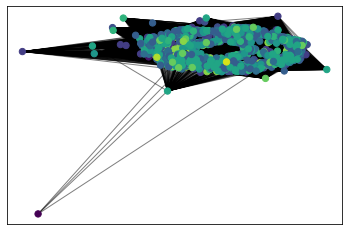

In [71]:
#  export partition dictionary to csv
import csv
with open('output.csv', 'w') as output:
    writer = csv.writer(output)
    for key, value in partition.items():
        writer.writerow([key, value])
#  remove blanks from output csv
df = pd.read_csv("output.csv")
#  checking the number of empty rows in th csv file
print (df.isnull().sum())
#  droping the empty rows
modifiedDF = df.dropna()
#  Saving it to the csv file
header = ['TAZ', 'cluster']
modifiedDF.to_csv('output_2.csv', header=header, index=False)
print('done')

100978    0
3         0
dtype: int64
done


        0
100978  3
100979  3
100980  3
100981  3
100982  3
...    ..
100622  2
100217  5
100564  2
101137  6
101176  0

[1270 rows x 1 columns]


In [102]:
print(partition)

{100978: 3, 100979: 3, 100980: 3, 100981: 3, 100982: 3, 100983: 3, 100984: 3, 101075: 3, 100106: 3, 100864: 3, 100865: 3, 100866: 3, 100867: 3, 100868: 3, 100869: 3, 100870: 3, 100893: 3, 100895: 3, 100896: 3, 100903: 3, 100904: 3, 100905: 3, 100906: 3, 100907: 3, 100908: 3, 100909: 3, 100910: 3, 100911: 3, 100912: 3, 100913: 3, 100914: 3, 100915: 3, 100916: 3, 100918: 3, 100919: 3, 100920: 3, 100921: 3, 100922: 3, 100923: 3, 100924: 3, 100925: 3, 100926: 3, 100927: 3, 100928: 3, 100929: 3, 100930: 3, 100931: 3, 100932: 3, 100933: 3, 100934: 3, 100935: 3, 100936: 3, 100937: 3, 100938: 3, 100945: 3, 100946: 3, 100947: 3, 100948: 3, 100949: 3, 100950: 3, 100955: 3, 100962: 3, 100963: 3, 101071: 3, 100871: 3, 100872: 3, 100873: 3, 100874: 3, 100875: 3, 100876: 3, 100877: 3, 100878: 3, 100879: 3, 100880: 3, 100881: 3, 100882: 3, 100883: 3, 100884: 3, 100885: 3, 100886: 3, 100887: 3, 100888: 3, 100889: 3, 100890: 3, 100891: 3, 100894: 3, 100897: 3, 100898: 3, 100899: 3, 100900: 3, 100901: 3